# Influence of the grid for Siegert states

The previous notebook introduced the influence of two grid parameters, the grid spacing and the grid extension, on the spectrum of bound and continuum states. Let us apply the same approach when a smooth exterior complex scaling is used, and see how these parameters influence the spectrum of Siegert states found.

## Initialization

### Import some modules and classes

In [1]:
from siegpy import (Hamiltonian, SWPotential, ErfKGCoordMap,
                    SWPBasisSet)
import numpy as np
from copy import deepcopy

### Define a potential

In [2]:
siegerts = SWPBasisSet.from_file("siegerts.dat")
pot = siegerts.potential

## Influence of the grid step

As in the previous notebook, let us first consider the influence of the grid step on the eigenstates found numerically.

### Define the same potential with multiple grid steps

In [3]:
# Set the grid extension
xmax = 7.5
# Set the various grids
factors = [1, 2, 4, 8, 16]
npts_list = [f*50 + 1 for f in factors]
print('npts_list:', npts_list)
xgrids = [np.linspace(-xmax, xmax, npts) for npts in npts_list]
# List the grid steps
hx_list = [g[1]-g[0] for g in xgrids]
print("grid spacings:", hx_list)
# Discretize the potential over the multiple grid steps
pots = []
for xgrid in xgrids:
    pots.append(deepcopy(pot))
    pots[-1].grid = xgrid

npts_list: [51, 101, 201, 401, 801]
grid spacings: [0.29999999999999982, 0.15000000000000036, 0.075000000000000178, 0.037499999999999645, 0.018749999999999822]


### Define the coordinate mapping

The same smooth exterior coordinate mapping will be used throughout this notebook:

In [4]:
theta = 0.6
x0 = 6.0
lbda = 1.5
cm = ErfKGCoordMap(theta, x0, lbda)

### Define the Hamiltonians

In [5]:
hams_hx = [Hamiltonian(pot, cm) for pot in pots]

### Solve the Hamiltonians

In [6]:
basissets_hx = [ham.solve() for ham in hams_hx]

### Compare the spectra

Again, the easiest way of comparing the spectra is to plot the energies of the eigenstates and their virial values:

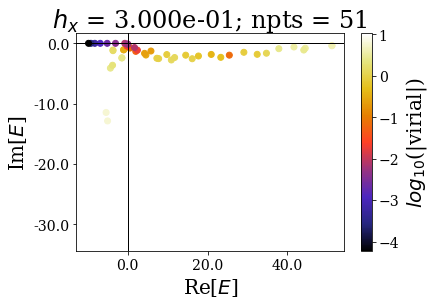

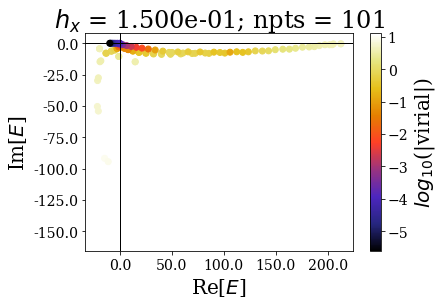

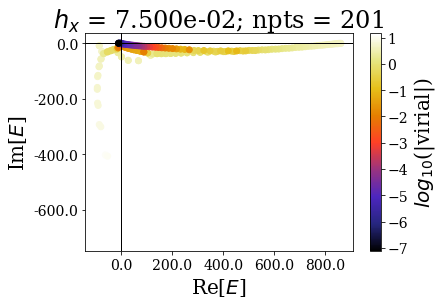

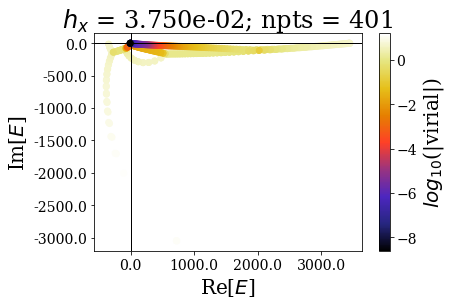

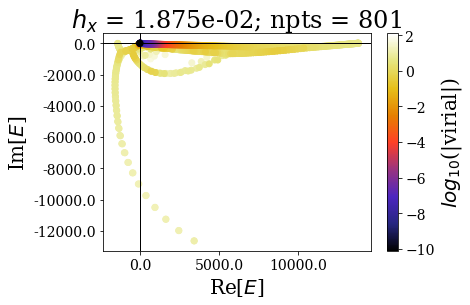

In [7]:
for i, basis in enumerate(basissets_hx):
    tit = "$h_x$ = {:.3e}; npts = {}".format(hx_list[i], len(basis))
    basis.plot_energies(title=tit, show_unknown=True)

It should not be a surprise to see that energies (and wavefunctions) can be complex after the application of smooth exterior complex scaling. Apart from that, the spectra are globally comparable with the previous case (when finding numerical bound and continuum states): by decreasing the grid step (*i.e.*, increasing the number of grid points), the energy range increases, and so does the range of virial values (lower virial values are obtained if more grid points are used, *i.e.* the quality of the numerical eigenstates gets better).

Also note how the minimal virial values and the maximal real energy and the minimal virial value are comparable to those found in the case of the uniform complex scaling.

Another way of comparing the basis sets is to define the same range for the energy plot, in order to see how the resonant states are affected by the grid step decrease:

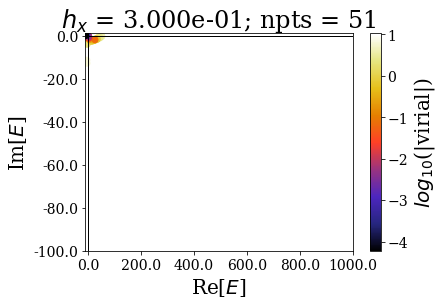

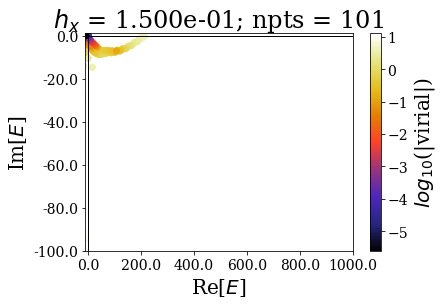

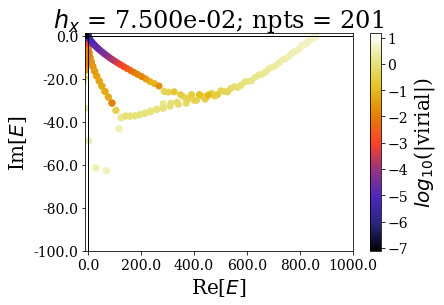

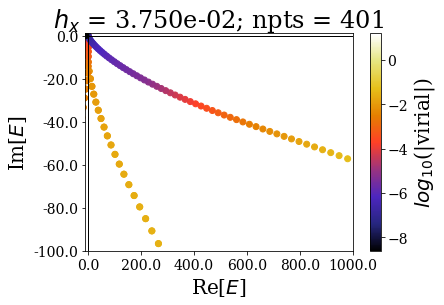

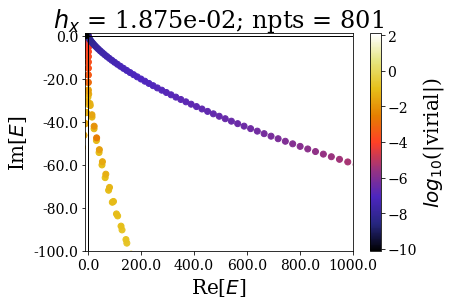

In [24]:
for i, basis in enumerate(basissets_hx):
    tit = "$h_x$ = {:.3e}; npts = {}".format(hx_list[i], len(basis))
    basis.plot_energies(xlim=(-12, 1000), ylim=(-100, 1), title=tit, show_unknown=True)

Decreasing the grid steps increases the range of resonant states that can be discriminated from the rest of the states. Still, note that once the grid step is sufficient to describe a resonant state, decreasing the grid step does not affect greatly the position of the resonant state. This is the equivalent of what was experienced for continuum states, where the continuum states of low energy were not largely altered by that increase of the number of grid points.

Zooming even more closely gives:

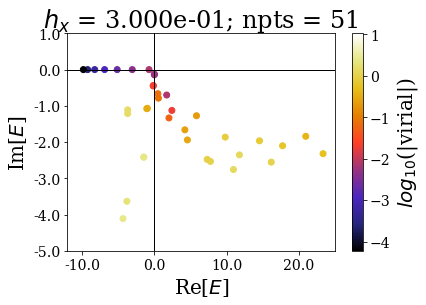

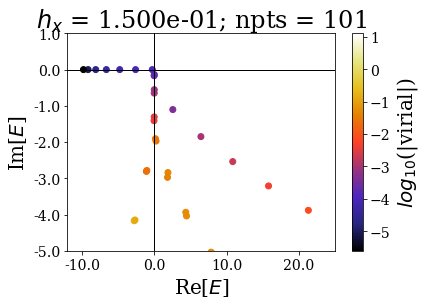

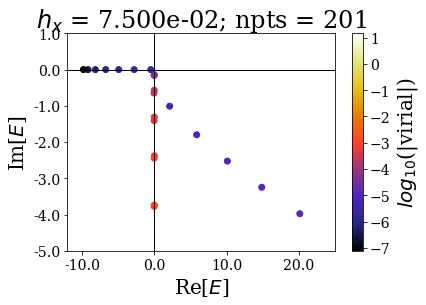

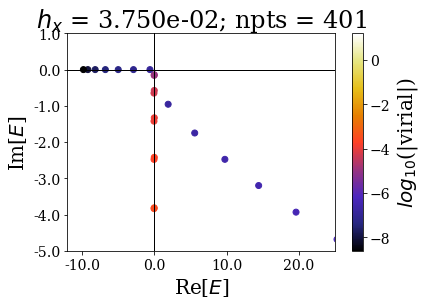

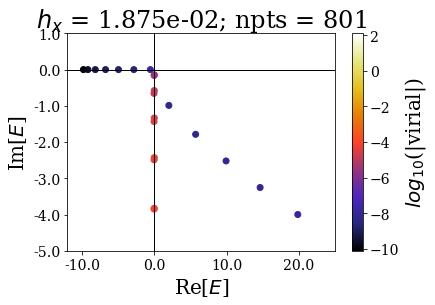

In [22]:
for i, basis in enumerate(basissets_hx):
    tit = "$h_x$ = {:.3e}; npts = {}".format(hx_list[i], len(basis))
    basis.plot_energies(xlim=(-12, 25), ylim=(-5, 1), title=tit, show_unknown=True)

The bound and resonant states can be more easily discriminated from the rest of the states as the number of grid points increases. Note how using only 201 grid points gives a similar plot as using 801 points (apart from the virial values): the effect of decreasing the grid step is the same if a smooth exterior complex scaling is used or not.

## Influence of the grid extension

It is now time to study the influence of the grid extension on the spectrum of resonant states.

### Define the same potential with multiple grid extensions

The grid spacing will now be fixed, while the grid extension is varied. The minimum grid extension will correspond to the inflexion point point of the smooth exterior coordinate mapping.

In [10]:
# Set the grid spacing
hx = 0.0375
# Set the various grids via the grid extension
factors = range(2, 5)
xmax_list = [5.5, 6.0, 6.5, 7.0] + [f*100*hx for f in factors]
print('xmax_list:', xmax_list)
xgrids = [np.arange(-xmax, xmax+3*hx/4, hx) for xmax in xmax_list]
# List the number of points
npts_list = [len(g) for g in xgrids]
print('npts_list:', npts_list)
# Discretize the potential over the multiple grid steps
pots = []
for xgrid in xgrids:
    pots.append(deepcopy(pot))
    pots[-1].grid = xgrid

xmax_list: [5.5, 6.0, 6.5, 7.0, 7.5, 11.25, 15.0]
npts_list: [295, 321, 348, 375, 401, 601, 801]


### Define the Hamiltonians

In [11]:
# The same uniform coordinate mapping is used
hams_xmax = [Hamiltonian(pot, cm) for pot in pots]

### Solve the Hamiltonians

In [12]:
basissets_xmax = [ham.solve(max_virial=10**-5) for ham in hams_xmax]

### Compare the spectra

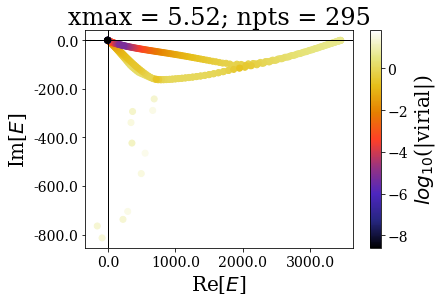

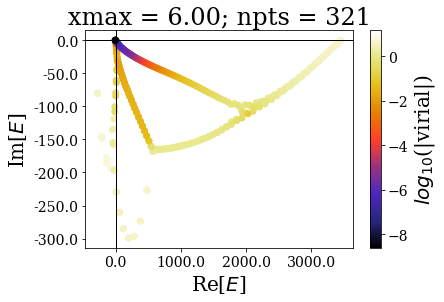

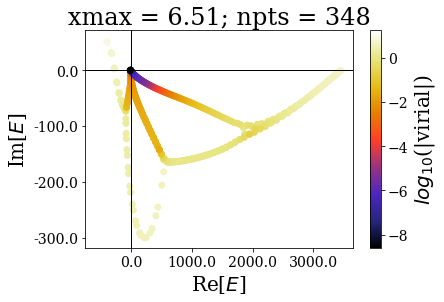

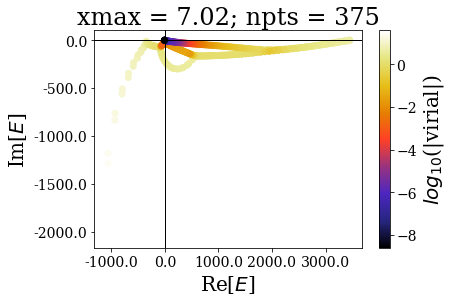

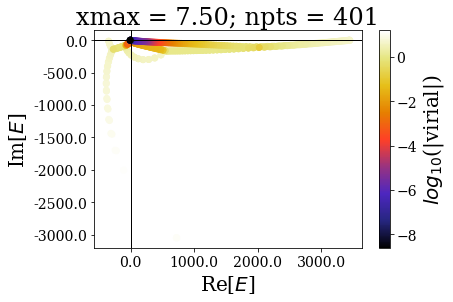

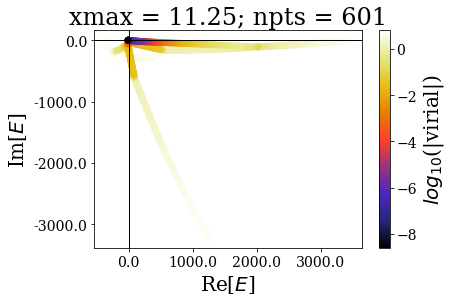

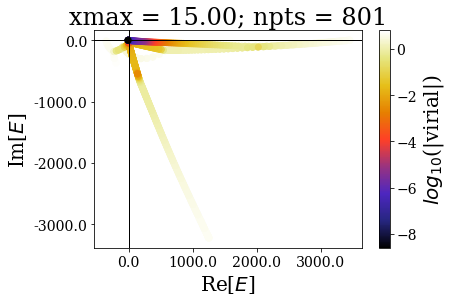

In [25]:
for basis in basissets_xmax:
    tit = "xmax = {:.2f}; npts = {}".format(basis[0].grid[-1], len(basis))
    basis.plot_energies(title=tit, show_unknown=True)

In the same manner as in the absence of coordinate mapping, increasing the grid extension does not modify the (real) energy range nor the range of the virial values. The main difference comes from the fact the additional states scatter in the whole complex plane.

Let us zoom in a given area of the complex energy plane:

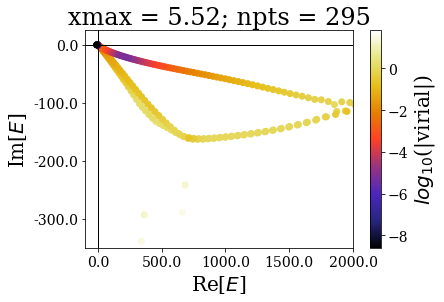

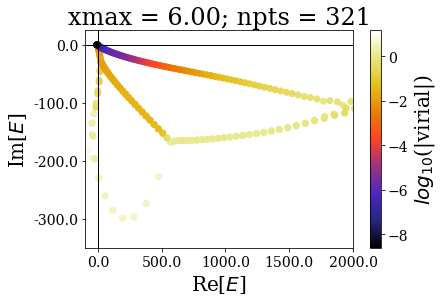

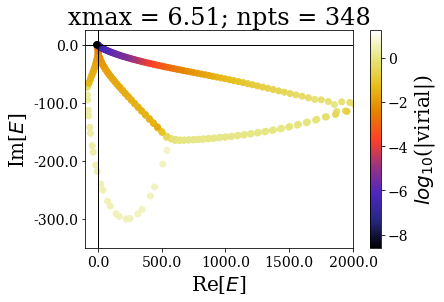

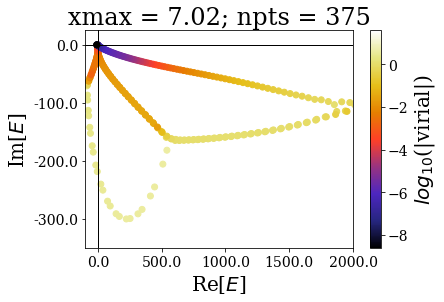

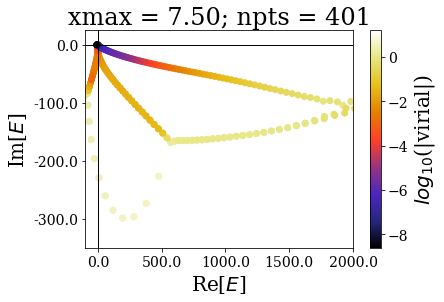

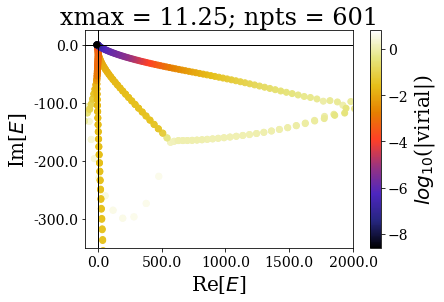

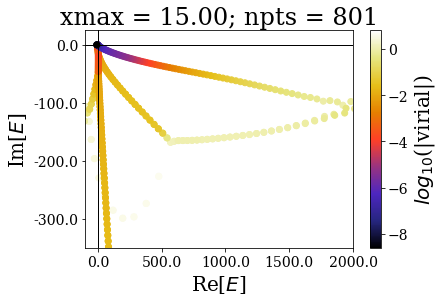

In [14]:
for basis in basissets_xmax:
    tit = "xmax = {:.2f}; npts = {}".format(basis[0].grid[-1], len(basis))
    basis.plot_energies(xlim=(-100, 2000), ylim=(-350, 25), title=tit, show_unknown=True)

The increase of the grid extension does not seem to affect the quality of the Siegert states, apart for the lowest values of $x_{max}$: the same resonant states are found, with the same virial expectation values. Only some "branches" see an increase of the density of states. 

This is actually a very good point in favour of the use of resonant states instead of the continuum states: they correspond to physically meaningful states (they share low virial expectation values with bound states and form complete basis sets) and they are increasing the grid extension has no effect in their numerical computations. Even though there is a need for a "buffer" zone at both ends of the grid for the smooth exterior complex scaling to be fully effective, there is no need to increase the grid extension to large values. It might even be more difficult to converge (with respect to $x_{max}$) a bound state of high energy rather than resonant states.

Zooming around the zero energy gives:

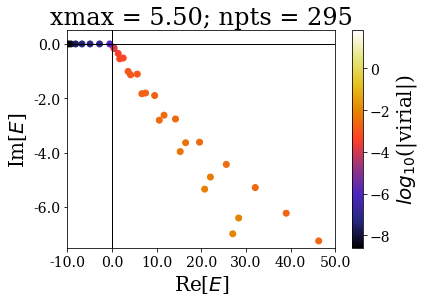

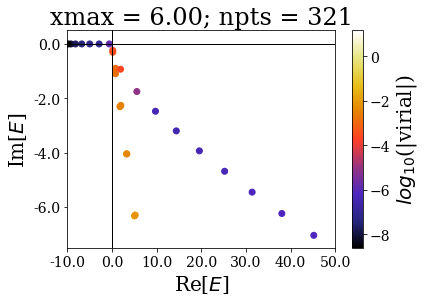

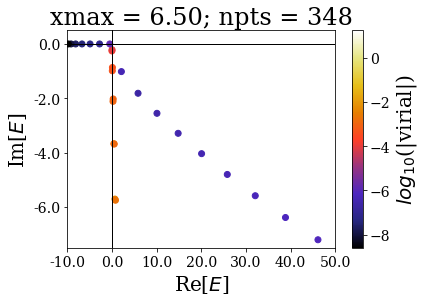

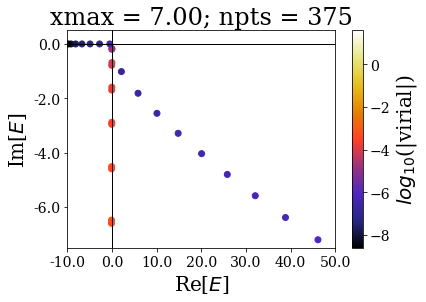

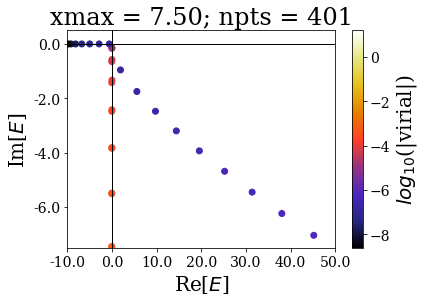

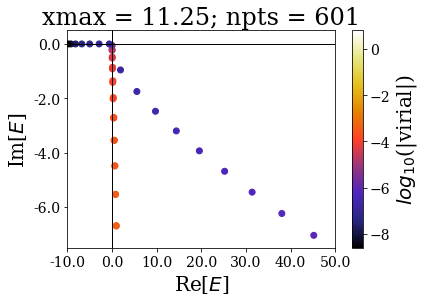

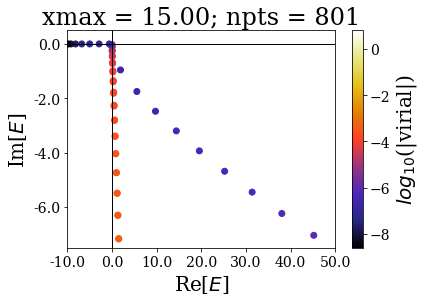

In [26]:
for basis in basissets_xmax:
    tit = "xmax = {:.2f}; npts = {}".format(-basis[0].grid[0], len(basis))
    basis.plot_energies(xlim=(-10, 50), ylim=(-7.5, 0.5), title=tit, show_unknown=True)

The last plots further show how the increase of the grid extension does not affect the numerical Siegert states.

## Conclusion

The grid step is a very important parameter, allowing to reach for resonant states of higher energy (just as in the absence of coordinate mapping, the energy range of ) and also decreases the virial operator expectation values, meaning that the numerical Siegert states are more easily discriminated from the rest of the states (and are of better quality, with lower virial values).

While the conclusions for the grid step parameters are not very different from the case without a coordinate mapping, increasing the grid extension does not affect the resonant states as it does for the continuum states: once the grid extension is large enough to discriminate the Siegert states from the rest of the states, there is no need to keep increasing it. The only limitation is the need for a buffer zone at both ends of the grid to let the coordinate mapping reach its asymtotic values. In practice, the requirement of such a buffer zone might not be dramatic, as it might require larger grid extensions to converge the bound states of highest energy.